# Check the Step Length in GEANT4

In [1]:
import ROOT
import numpy as np
import pandas as pd

In [2]:
filename = '/Users/yuntse/data/coherent/preLArTPC/geant4/cosmic1000.root'
f = ROOT.TFile( filename, 'READ')
t = f.Get("edep")

In [3]:
t.GetEntries()

6283445

## Calculate the step length

In [4]:
def stepLength( x1, y1, z1, x2, y2, z2 ):
    return np.sqrt( (x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2 )

## Count the steps in LAr

In [5]:
stepLs = []
pdgs = []
# unit in mm
larR = 460
larHalfH = 610
eps = 0.00001

In [ ]:
for s in t:
    startR = np.sqrt( s.startX**2 + s.startY**2 )
    endR = np.sqrt( s.endX**2 + s.endY**2 )
    
    if s.pdg == 22 or s.pdg == 12 or s.pdg == 14 or s.pdg == 16:
        continue
    
    if startR <= larR and s.startZ <= larHalfH and s.startZ >= -larHalfH:
        sL = stepLength( s.startX, s.startY, s.startZ, s.endX, s.endY, s.endZ )
        stepLs.append( sL )
        pdgs.append( s.pdg )
        if sL > 100.:
            print( f'{s.pdg}, {sL:.02f}, {s.startX:.02f}, {s.startY:.02f}, {startR:.02f}, {s.startZ:.02f}, \
            {s.endX:.02f}, {s.endY:.02f}, {endR:.02f}, {s.endZ:.02f}' )
        continue

    if endR <= larR and s.endZ <= larHalfH and s.endZ >= -larHalfH:
        sL = stepLength( s.startX, s.startY, s.startZ, s.endX, s.endY, s.endZ )
        stepLs.append( sL )
        pdgs.append( s.pdg )
        if sL > 100.:
            print( f'{s.pdg}, {sL:.02f}, {s.startX:.02f}, {s.startY:.02f}, {startR:.02f}, {s.startZ:.02f}, \
            {s.endX:.02f}, {s.endY:.02f}, {endR:.02f}, {s.endZ:.02f}' )

13, 1999.45, 202.68, 193.62, 280.30, 2600.00,             128.48, 373.02, 394.53, 610.00
13, 119.14, 114.13, 401.97, 417.86, 241.56,             106.83, 411.10, 424.75, 122.99
13, 127.13, 104.60, 412.73, 425.78, 98.08,             92.85, 421.42, 431.53, -28.21
13, 29392.69, 24.19, 454.84, 455.48, -610.00,             -4844.10, 856.25, 4919.19, -29593.94
13, 1991.42, 90.62, -11.11, 91.30, 2600.00,             160.85, -38.05, 165.29, 610.00
13, 112.20, 191.01, -51.94, 197.94, -100.37,             196.14, -55.56, 203.86, -212.40
13, 29377.23, 214.11, -68.78, 224.89, -610.00,             1699.65, -1156.08, 2055.56, -29929.49
13, 1992.82, 261.88, 89.41, 276.72, 2600.00,             342.64, 157.89, 377.27, 610.00
13, 147.05, 343.37, 158.52, 378.20, 591.84,             348.99, 163.68, 385.47, 444.99
13, 126.92, 356.41, 168.72, 394.33, 279.64,             362.48, 172.56, 401.46, 152.92
13, 29371.11, 388.92, 200.48, 437.55, -610.00,             1230.27, 984.90, 1575.94, -29958.58
11, 1996.27, 2

In [7]:
len(stepLs)

2820

In [8]:
stepLA = np.array( stepLs )
pdgA = np.array( pdgs )
stepLA.max()

30120.298002216638

In [9]:
np.sum(stepLA > 20)

280

In [10]:
np.sum(stepLA > 100)

14

In [11]:
for s, pdg in zip( stepLA, pdgA ):
    if s > 20:
        print( s, pdg )

21.23856230371204 13
21.893193222843436 13
27.282852640260423 13
57.15789152134255 13
60.48925463702331 13
25.001399629383517 13
68.26682453751107 13
52.1342123875892 13
63.828816356195404 13
30.260340730510087 13
80.90737369013563 13
64.99603554236543 13
20.750210716065858 13
52.60937241186298 13
24.869272788594348 13
33.099263335165595 13
26.039486406786345 13
23.231403765784634 13
56.771146066876234 13
27.25918208076363 13
31.782568384516228 13
40.03510024900136 13
53.216477677067225 13
78.9547254353112 13
20.318356427998097 13
23.22036097489589 13
24.954757152843925 13
25.745590035293027 13
111.55913498491284 13
42.326394322376835 13
81.15979647653707 13
75.573965496259 13
77.28125943250728 13
54.9365915234091 13
25.67454155851139 13
21.6051223366248 13
43.17129265504587 13
91.7353690053313 13
49.93431908799451 13
85.73884553482624 13
55.71659417135321 13
103.63336016770548 13
23.837917193598837 13
28.532511146114608 13
31.392782668913334 13
28.95018067306483 13
23.349826976460726 

### Plots

In [11]:
import matplotlib.pyplot as plt

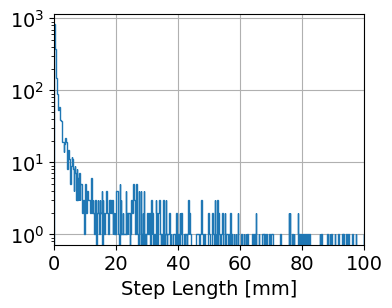

In [15]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(stepLA, bins = np.linspace(0, 100, 500), histtype = 'step', log=True)
ax.set_xlabel( 'Step Length [mm]', fontsize = 14 )
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_xlim( [0, 100])
# ax.set_ylim( [0, 1.1])

ax.grid(":")

## Count the steps in LArTPC

In [4]:
# unit in mm, half the dimension
larX = 250.
larY = 300.
larZ = 300.

In [5]:
def particleLength( start, end ):
    return np.sqrt( np.sum([ dL**2 for dL in end-start ]) )

In [6]:
columns = [ 'Run', 'Event', 'TrackID', 'MotherID', 'Pdg', 'StartE', 'dE', 'StartX', 'StartY', 'StartZ', 
           'EndX', 'EndY', 'EndZ', 'RealTrackLength', 'StraightTrackLength']
df = pd.DataFrame( columns = columns )

In [7]:
Evt = -1
TrackID = -1
StartPos = np.array([0., 0., 7000.])

for s in t:
    
    if s.pdg == 22 or np.abs(s.pdg) == 12 or np.abs(s.pdg) == 14 or np.abs(s.pdg) == 16:
        continue
    
    mask = ( np.abs(s.startX) <= larX ) & ( np.abs(s.startY) <= larY ) & ( np.abs(s.startZ) <= larZ ) & \
            ( np.abs(s.endX) <= larX ) & ( np.abs(s.endY) <= larY ) & ( np.abs(s.endZ) <= larZ )
    if mask:
        print( s.event, s.pdg, s.trackID, f'{s.startE:.02f}, {s.dE:.02f}, {s.startX:.02f}, {s.startY:.02f},\
        {s.startZ:.02f}, {s.endX:.02f}, {s.endY:.02f}, {s.endZ:.02f}')
            
        if s.event == Evt and s.trackID == TrackID:
            thisStartPos = np.array([ s.startX, s.startY, s.startZ ])
            EndPos = np.array([ s.endX, s.endY, s.endZ ])
            df.loc[df.index[-1], 'dE'] += s.dE
            df.loc[df.index[-1], 'EndX'] = s.endX
            df.loc[df.index[-1], 'EndY'] = s.endY
            df.loc[df.index[-1], 'EndZ'] = s.endZ
            df.loc[df.index[-1], 'RealTrackLength'] += particleLength( thisStartPos, EndPos )
            df.loc[df.index[-1], 'StraightTrackLength'] = particleLength( StartPos, EndPos )
                
        else:
            Evt = s.event
            TrackID = s.trackID
            StartPos[:] = [ s.startX, s.startY, s.startZ ]
            EndPos = np.array([ s.endX, s.endY, s.endZ ])
            RealTrackLength = particleLength( StartPos, EndPos )
                
            df_temp = pd.DataFrame([ { 'Run': 0, 'Event': s.event, 'TrackID': s.trackID, 
                                        'MotherID': s.motherID, 
                                        'Pdg': s.pdg, 'StartE': s.startE, 'dE': s.dE, 'StartX': s.startX, 
                                        'StartY': s.startY, 'StartZ': s.startZ, 'EndX': s.endX, 'EndY': s.endY,
                                        'EndZ': s.endZ, 'RealTrackLength': RealTrackLength, 
                                        'StraightTrackLength': RealTrackLength } ])
            df = pd.concat([ df, df_temp ], ignore_index = True )


20 11 267 0.53, 0.02, 212.95, 109.75,        -154.14, 212.95, 109.75, -154.14
20 11 266 1.07, 0.56, 188.99, 69.37,        -146.89, 189.24, 68.96, -147.27
20 11 265 1.57, 0.45, 119.18, 110.04,        -66.82, 119.37, 111.01, -67.76
20 11 265 1.12, 0.33, 119.37, 111.01,        -67.76, 119.56, 110.93, -68.42
20 11 265 0.79, 0.28, 119.56, 110.93,        -68.42, 119.42, 111.07, -68.49
20 11 264 7.45, 0.03, 112.68, 103.81,        -52.72, 112.64, 103.76, -52.99
20 11 264 7.37, 1.66, 112.64, 103.76,        -52.99, 111.20, 101.82, -60.72
20 11 264 5.71, 1.59, 111.20, 101.82,        -60.72, 110.12, 100.18, -66.66
20 11 264 4.12, 0.60, 110.12, 100.18,        -66.66, 112.73, 100.12, -68.65
20 11 264 3.47, 0.99, 112.73, 100.12,        -68.65, 115.64, 99.65, -70.91
20 11 264 2.48, 0.58, 115.64, 99.65,        -70.91, 116.30, 97.71, -72.41
20 11 264 1.91, 0.45, 116.30, 97.71,        -72.41, 116.46, 95.95, -72.84
20 11 264 1.45, 0.41, 116.46, 95.95,        -72.84, 117.36, 95.33, -73.33
20 11 264 1.04, 0

268 13 1 1609.90, 1.57, -12.09, -119.58,        292.10, -12.28, -119.72, 283.73
268 13 1 1607.97, 2.20, -12.28, -119.72,        283.73, -12.56, -119.93, 271.51
268 13 1 1604.71, 5.50, -12.56, -119.93,        271.51, -13.25, -120.42, 241.07
268 13 1 1597.68, 8.10, -13.25, -120.42,        241.07, -14.56, -120.87, 198.50
268 13 1 1589.26, 6.68, -14.56, -120.87,        198.50, -15.63, -121.69, 156.85
268 13 1 1582.30, 0.11, -15.63, -121.69,        156.85, -15.66, -121.70, 156.06
268 13 1 1581.33, 0.89, -15.66, -121.70,        156.06, -15.81, -121.82, 151.31
268 13 1 1580.13, 1.48, -15.81, -121.82,        151.31, -16.05, -122.01, 143.93
268 13 1 1577.94, 6.84, -16.05, -122.01,        143.93, -17.16, -122.89, 107.84
268 13 1 1569.94, 0.67, -17.16, -122.89,        107.84, -17.28, -122.97, 104.06
268 13 1 1568.89, 4.31, -17.28, -122.97,        104.06, -18.03, -123.51, 79.13
268 13 1 1564.11, 10.98, -18.03, -123.51,        79.13, -19.90, -124.95, 16.70
268 13 1 1552.83, 0.48, -19.90, -124.95,  

498 11 8240 0.65, 0.14, 115.16, -249.20,        124.87, 115.11, -249.24, 124.91
498 11 8239 0.53, 0.02, 110.38, -219.72,        51.21, 110.39, -219.72, 51.21
498 11 8238 0.57, 0.06, 21.44, -213.62,        -5.23, 21.44, -213.63, -5.24
498 11 8237 0.58, 0.07, 6.10, -173.29,        9.14, 6.11, -173.27, 9.15
498 11 8236 0.59, 0.08, -202.12, -162.44,        38.33, -202.12, -162.46, 38.35
498 11 8250 0.64, 0.13, -228.35, -111.58,        -95.03, -228.29, -111.61, -95.04
498 11 8265 0.52, 0.01, -242.28, -96.17,        -40.10, -242.28, -96.17, -40.10
498 11 8264 0.54, 0.03, -226.08, -115.79,        -37.80, -226.07, -115.79, -37.81
498 11 8263 0.57, 0.06, -233.35, -123.81,        -29.69, -233.34, -123.83, -29.68
498 11 8274 0.63, 0.12, -147.89, -47.75,        -240.72, -147.86, -47.75, -240.67
498 11 8273 0.52, 0.01, -166.80, -65.09,        -250.80, -166.80, -65.09, -250.80
498 11 8272 0.54, 0.03, -230.03, -98.62,        -235.92, -230.04, -98.62, -235.92
498 11 8271 0.56, 0.05, -233.76, -121.67, 

631 13 2 738.73, 2.85, -203.70, -193.34,        291.30, -204.06, -193.75, 274.36
631 13 2 734.99, 4.48, -204.06, -193.75,        274.36, -204.45, -194.51, 249.16
631 13 2 730.14, 0.03, -204.45, -194.51,        249.16, -204.45, -194.51, 249.09
631 13 2 729.81, 1.53, -204.45, -194.51,        249.09, -204.62, -194.76, 241.27
631 13 2 727.94, 0.62, -204.62, -194.76,        241.27, -204.70, -194.84, 238.16
631 13 2 726.48, 2.03, -204.70, -194.84,        238.16, -204.99, -195.18, 225.83
631 13 2 723.16, 1.48, -204.99, -195.18,        225.83, -205.20, -195.38, 217.32
631 13 2 719.90, 0.88, -205.20, -195.38,        217.32, -205.35, -195.49, 211.95
631 13 2 718.58, 1.37, -205.35, -195.49,        211.95, -205.59, -195.67, 203.99
631 13 2 716.68, 0.79, -205.59, -195.67,        203.99, -205.70, -195.75, 199.00
631 13 2 713.40, 3.19, -205.70, -195.75,        199.00, -206.14, -195.89, 180.26
631 13 2 709.89, 10.85, -206.14, -195.89,        180.26, -207.22, -196.02, 119.31
631 13 2 698.42, 14.36, -20

742 11 1495 0.52, 0.01, -184.54, 295.23,        -97.94, -184.54, 295.23, -97.94
917 11 731 0.54, 0.03, 241.41, -71.18,        -50.36, 241.41, -71.17, -50.36
917 11 730 0.51, 0.00, 245.43, -85.58,        -63.59, 245.43, -85.58, -63.59
917 11 729 0.52, 0.01, 245.25, -86.28,        -64.20, 245.25, -86.28, -64.20


In [8]:
trackIDcsvFile = 'TrackID.csv'
df.to_csv( trackIDcsvFile, index = False)

In [9]:
df

,Run,Event,TrackID,MotherID,Pdg,StartE,dE,StartX,StartY,StartZ,EndX,EndY,EndZ,RealTrackLength,StraightTrackLength
0,0,20,267,249,11,0.526325,0.015326,212.953124,109.751380,-154.136232,212.952296,109.752496,-154.135642,0.001509,0.001509
1,0,20,266,249,11,1.068383,0.557384,188.987767,69.369724,-146.887601,189.236923,68.960255,-147.270356,0.613389,0.613389
2,0,20,265,249,11,1.569157,1.058158,119.179870,110.039987,-66.823199,119.417044,111.069287,-68.488872,2.267233,1.972353
3,0,20,264,249,11,7.447254,6.840935,112.684202,103.814744,-52.722701,117.484126,95.191609,-72.852480,27.897732,22.418870
4,0,20,280,279,11,0.560406,0.049407,116.735476,100.211592,-72.574820,116.728204,100.203367,-72.579096,0.011782,0.011782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,631,1021,1020,11,0.513033,0.002034,-194.234560,-196.640186,281.747065,-194.234528,-196.640144,281.747067,0.000053,0.000053
246,0,742,1495,1488,11,0.522642,0.011643,-184.542394,295.232056,-97.936151,-184.541921,295.231375,-97.935722,0.000934,0.000934
247,0,917,731,721,11,0.539561,0.028562,241.409987,-71.176587,-50.361305,241.408772,-71.172394,-50.360219,0.004499,0.004499
248,0,917,730,721,11,0.513057,0.002058,245.428250,-85.579301,-63.594840,245.428304,-85.579296,-63.594841,0.000054,0.000054


In [10]:
evtCol = [ 'Run', 'Event', 'eTotalE', 'eMaxE', 'eMaxLength', 'muLength' ]
evtDF = pd.DataFrame( columns = evtCol )

In [11]:
evtID = np.array([ -1, -1 ])
eTotalE = 0.
eMaxE = 0.

for row in df.itertuples( index = False):
    if ((row.Run, row.Event) != evtID).any():
        evtID = np.array([ row.Run, row.Event ])
        if np.abs(row.Pdg) == 13:
            df_temp = pd.DataFrame([{ 'Run': row.Run, 'Event': row.Event, 'eTotalE': 0., 'eMaxE': 0.,
                                   'eMaxLength': 0., 'muLength': row.StraightTrackLength }])
            
            evtDF = pd.concat([ evtDF, df_temp ], ignore_index = True)
        else:
            df_temp = pd.DataFrame([{ 'Run': row.Run, 'Event': row.Event, 'eTotalE': row.dE, 'eMaxE': row.dE,
                                   'eMaxLength': row.StraightTrackLength, 'muLength': 0. }])
            
            evtDF = pd.concat([ evtDF, df_temp ], ignore_index = True)
    else:
        if np.abs(row.Pdg) == 13:
            evtDF.loc[evtDF.index[-1], 'muLength'] = row.StraightTrackLength
        else:
            evtDF.loc[evtDF.index[-1], 'eTotalE'] += row.dE
            if row.dE > evtDF.loc[evtDF.index[-1], 'eMaxE']:
                evtDF.loc[evtDF.index[-1], 'eMaxE'] = row.dE
                evtDF.loc[evtDF.index[-1], 'eMaxLength'] = row.StraightTrackLength

In [12]:
evtDF

,Run,Event,eTotalE,eMaxE,eMaxLength,muLength
0,0,20,8.877772,6.840935,22.418870,0.000000
1,0,203,39.676175,18.096557,76.776864,550.725862
2,0,268,22.046533,6.023173,15.193777,483.149893
3,0,450,7.307231,4.470253,9.284173,0.000000
4,0,498,1.545461,0.613130,0.642432,0.000000
5,0,511,14.400856,6.084419,26.378886,340.236343
6,0,606,45.613732,14.879119,57.785310,570.678116
7,0,607,0.092825,0.092825,0.035206,0.000000
8,0,631,34.845537,6.055364,19.131930,575.164321
9,0,742,0.011643,0.011643,0.000934,0.000000


In [32]:
((-1, 0) != evtID).all()

False